In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [28]:
# Uploading CSV files from the location
algo_upload = Path("C:\\Users\\vinot\\Fintech_Homeworks\\HW03_Pandas\\algo_returns.csv")
sp500_upload=Path("C:\\Users\\vinot\\Fintech_Homeworks\\HW03_Pandas\\sp500_history.csv")
whale_upload=Path("C:\\Users\\vinot\\Fintech_Homeworks\\HW03_Pandas\\whale_returns.csv")

In [29]:
#Reading the uploaded CSV files
algo_data=pd.read_csv(algo_upload,index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_data=pd.read_csv(whale_upload,index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_data=pd.read_csv(sp500_upload,index_col="Date",parse_dates=True,infer_datetime_format=True)

In [30]:
sp500_upd=sp500_data.sort_values("Date",ascending=True)
algo_upd=algo_data.sort_values("Date",ascending=True)
whale_upd=whale_data.sort_values("Date",ascending=True)

In [31]:
whale_upd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [32]:
sp500_upd.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [33]:
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [34]:
whale_upd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [35]:
whale_upd.dropna(inplace=True)
whale_upd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [36]:
sp500_upd.isnull().sum()

Close    0
dtype: int64

In [37]:
algo_upd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [38]:
algo_upd.dropna(inplace=True)
algo_upd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [39]:
sp500_upd.dtypes

Close    object
dtype: object

In [40]:
#sp500_upd['Close'] = sp500_upd['Close'].str.replace(r'\D', '').astype('float64')

In [41]:
sp500_upd["Close"] = sp500_upd["Close"].str.replace('$', '').astype('float64')

In [42]:
sp500_upd.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [51]:
sp500_returns=sp500_upd.pct_change()
sp500_returns.dropna(inplace=True)
sp500_returns=sp500_returns.rename(columns={"Close":"S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [67]:
portfolio_combined=pd.concat([whale_upd,algo_upd,sp500_returns],axis='columns',join='inner')
portfolio_combined.dropna(inplace=True)
portfolio_combined.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [246]:
portfolio_combined.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [68]:
portfolio_returns=portfolio_combined.pct_change()
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.033072
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.272547
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-12.850368
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.278290
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-5.300052


In [2]:
portfolio_combined.plot(figsize=(30,15), title="Daily Returns");

NameError: name 'portfolio_combined' is not defined

In [3]:
portfolio_returns.plot(figsize=(30,15), title="Portfolio Returns");

NameError: name 'portfolio_returns' is not defined

In [71]:
#Calculate Cumulative Returns
cumulative_returns = (1+ portfolio_combined).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


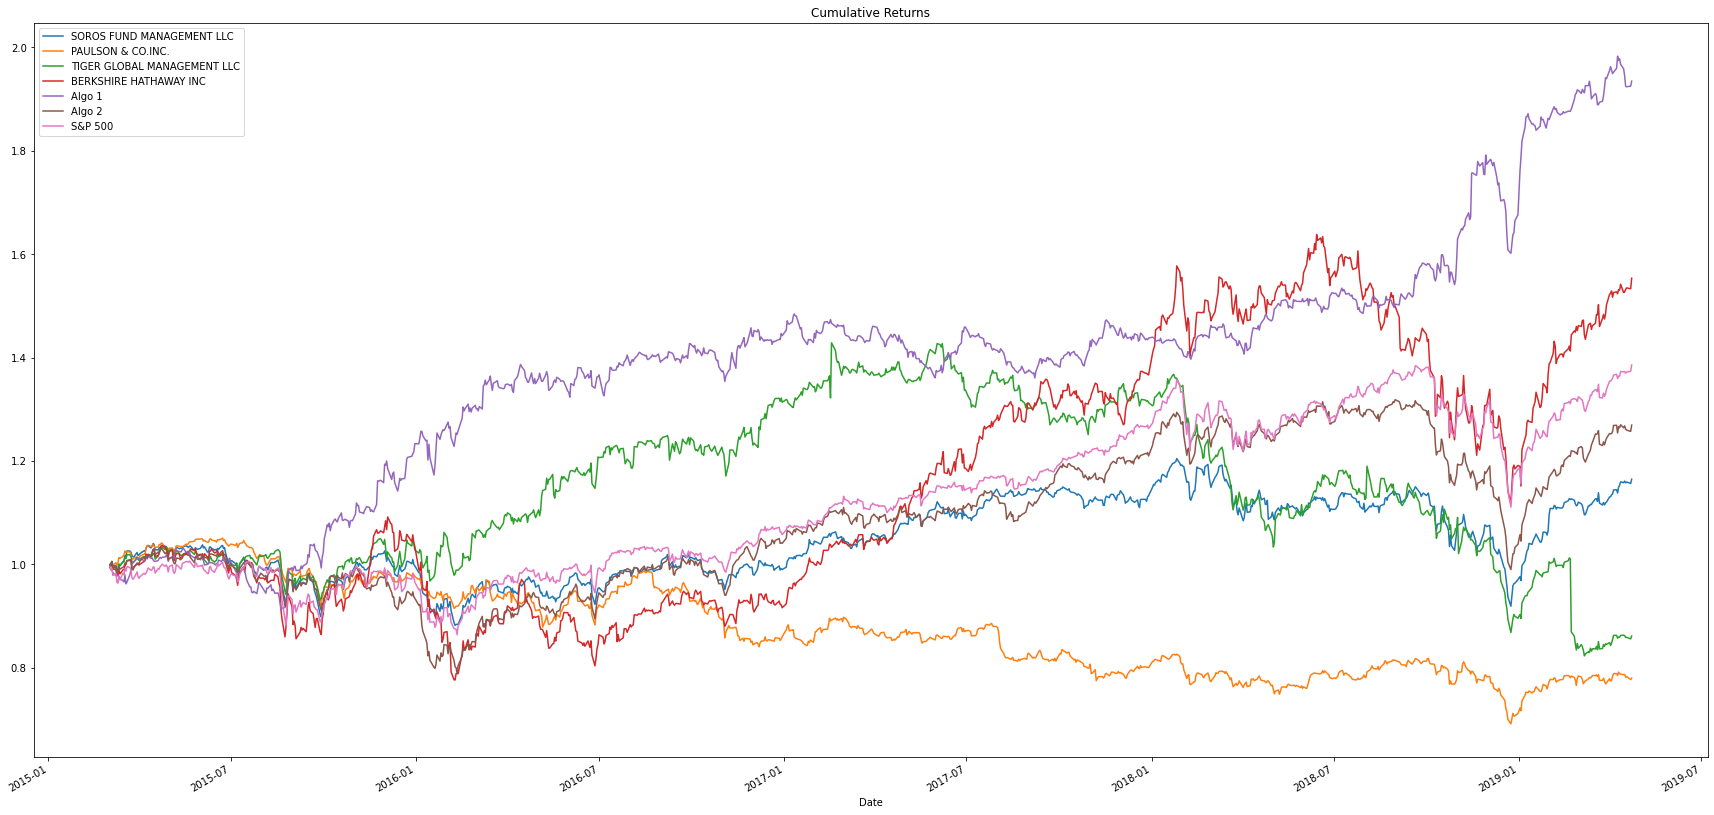

In [72]:
cumulative_returns.plot(figsize=(30,15), title="Cumulative Returns");

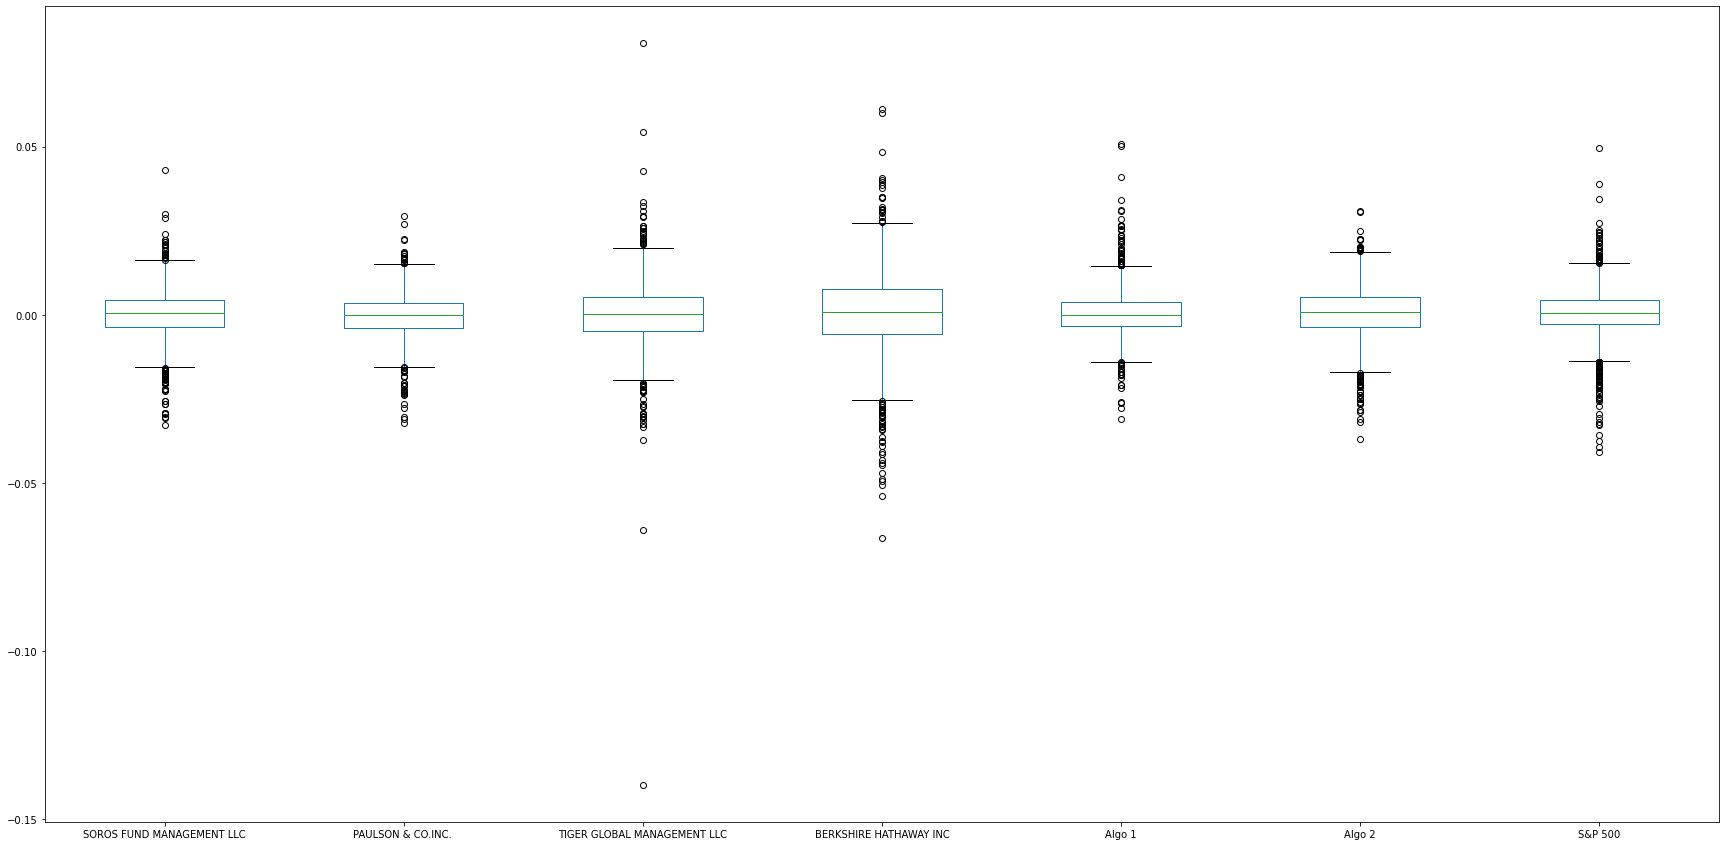

In [78]:
portfolio_combined.plot.box(figsize=(30,15));

In [79]:
portfolio_daily_std = portfolio_combined.std()
print(portfolio_daily_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


In [83]:
portfolio_daily_std > portfolio_daily_std ['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [85]:
portfolio_annual_std=portfolio_daily_std*np.sqrt(252)
print(portfolio_annual_std)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64


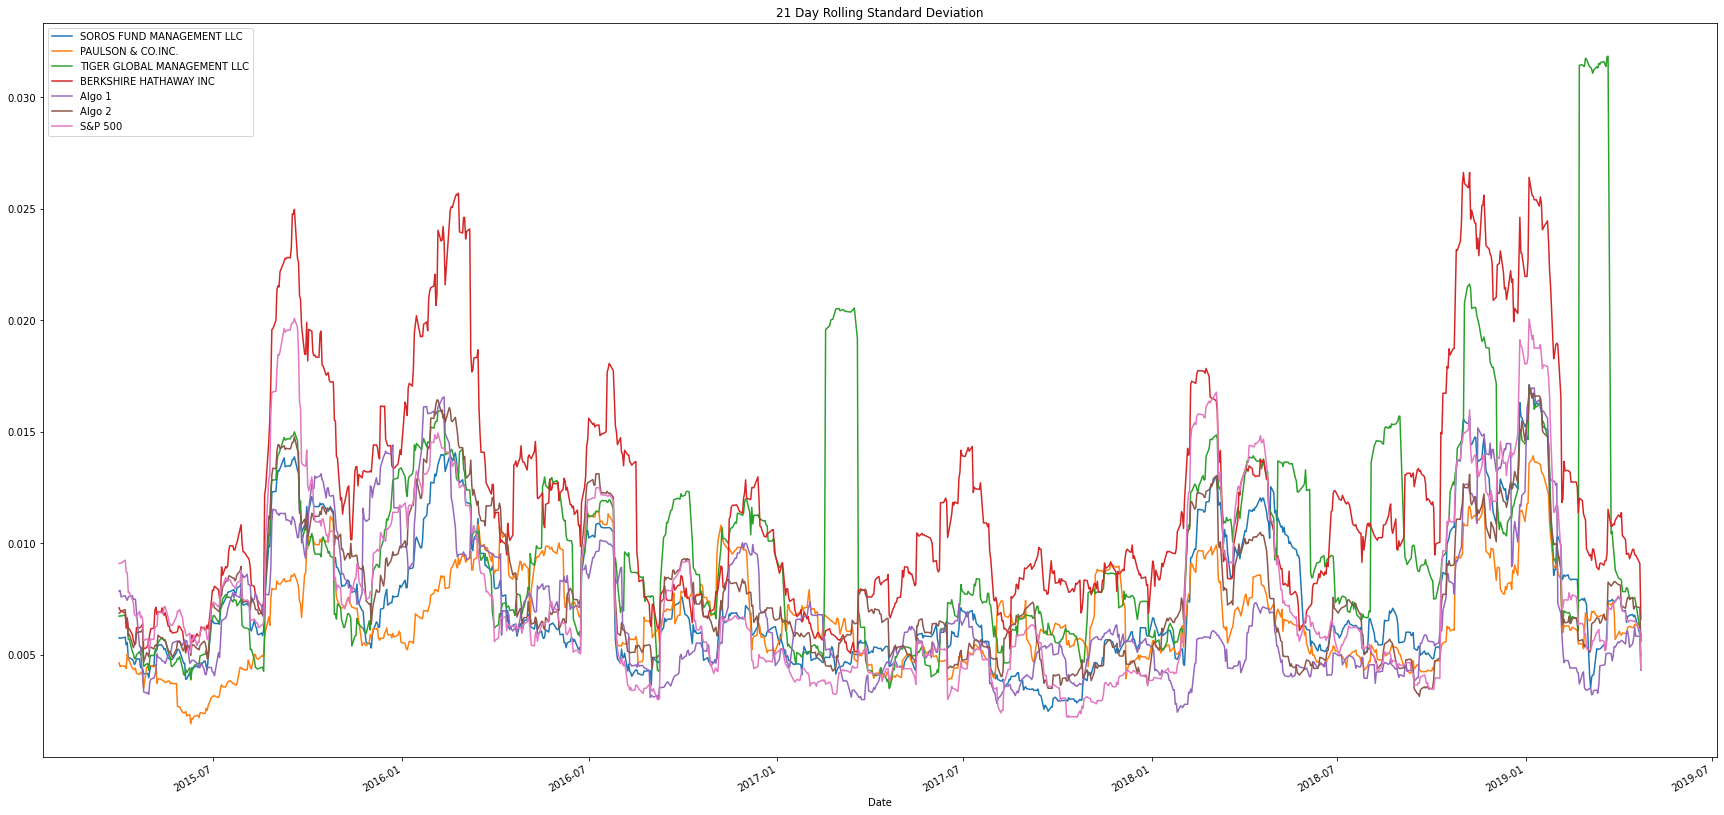

In [87]:
portfolio_combined.rolling(window=21).std().plot(figsize=(30,15), title="21 Day Rolling Standard Deviation");

In [90]:
#Calculate the Correalation
portfolio_correlation=portfolio_combined.corr()
portfolio_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [130]:
#Caculate the Rolling Covariance and Variance
portfolio_SOR_rolling_covariance=portfolio_combined['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(portfolio_combined['S&P 500'])
portfolio_PAU_rolling_covariance=portfolio_combined["PAULSON & CO.INC. "].rolling(window=30).cov(portfolio_combined['S&P 500'])
portfolio_TGR_rolling_covariance=portfolio_combined['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(portfolio_combined['S&P 500'])
portfolio_BER_rolling_covariance=portfolio_combined['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(portfolio_combined['S&P 500'])
portfolio_ALG1_rolling_covariance=portfolio_combined['Algo 1'].rolling(window=30).cov(portfolio_combined['S&P 500'])
portfolio_ALG2_rolling_covariance=portfolio_combined['Algo 2'].rolling(window=30).cov(portfolio_combined['S&P 500'])
portfolio_rolling_variance=portfolio_combined['S&P 500'].rolling(window=30).var()

In [137]:
portfolio_SOR_beta=portfolio_SOR_rolling_covariance / portfolio_rolling_variance
portfolio_PAU_beta=portfolio_PAU_rolling_covariance / portfolio_rolling_variance
portfolio_TGR_beta=portfolio_TGR_rolling_covariance / portfolio_rolling_variance
portfolio_BER_beta=portfolio_BER_rolling_covariance / portfolio_rolling_variance
portfolio_ALG1_beta=portfolio_ALG1_rolling_covariance / portfolio_rolling_variance
portfolio_ALG2_beta=portfolio_ALG2_rolling_covariance / portfolio_rolling_variance

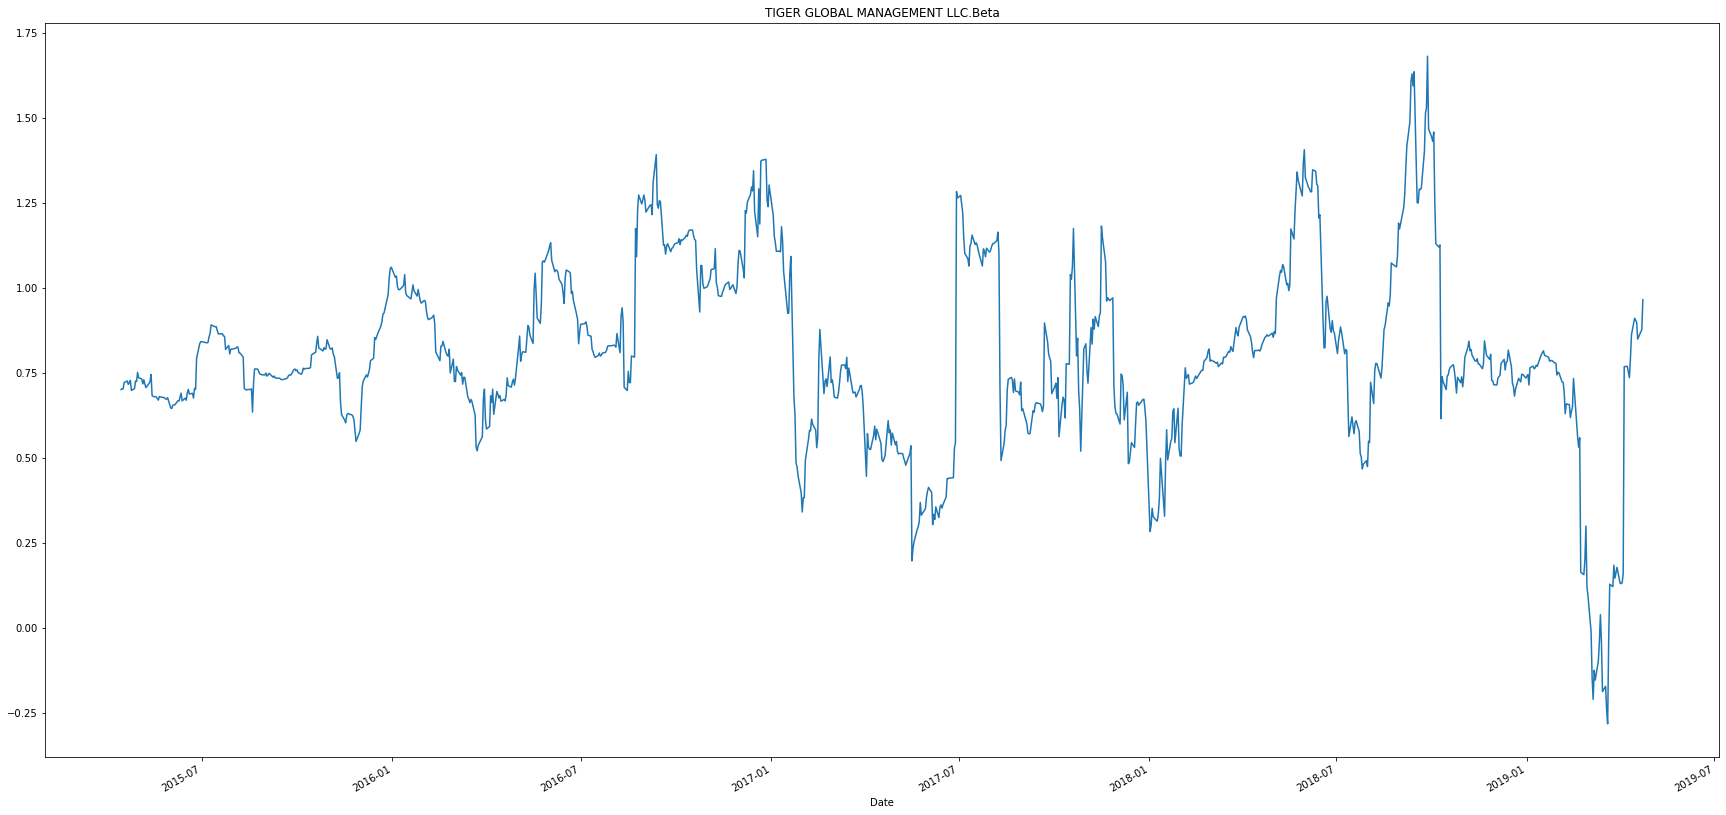

In [116]:
portfolio_TGR_beta.plot(figsize=(30,15),title="TIGER GLOBAL MANAGEMENT LLC.Beta");

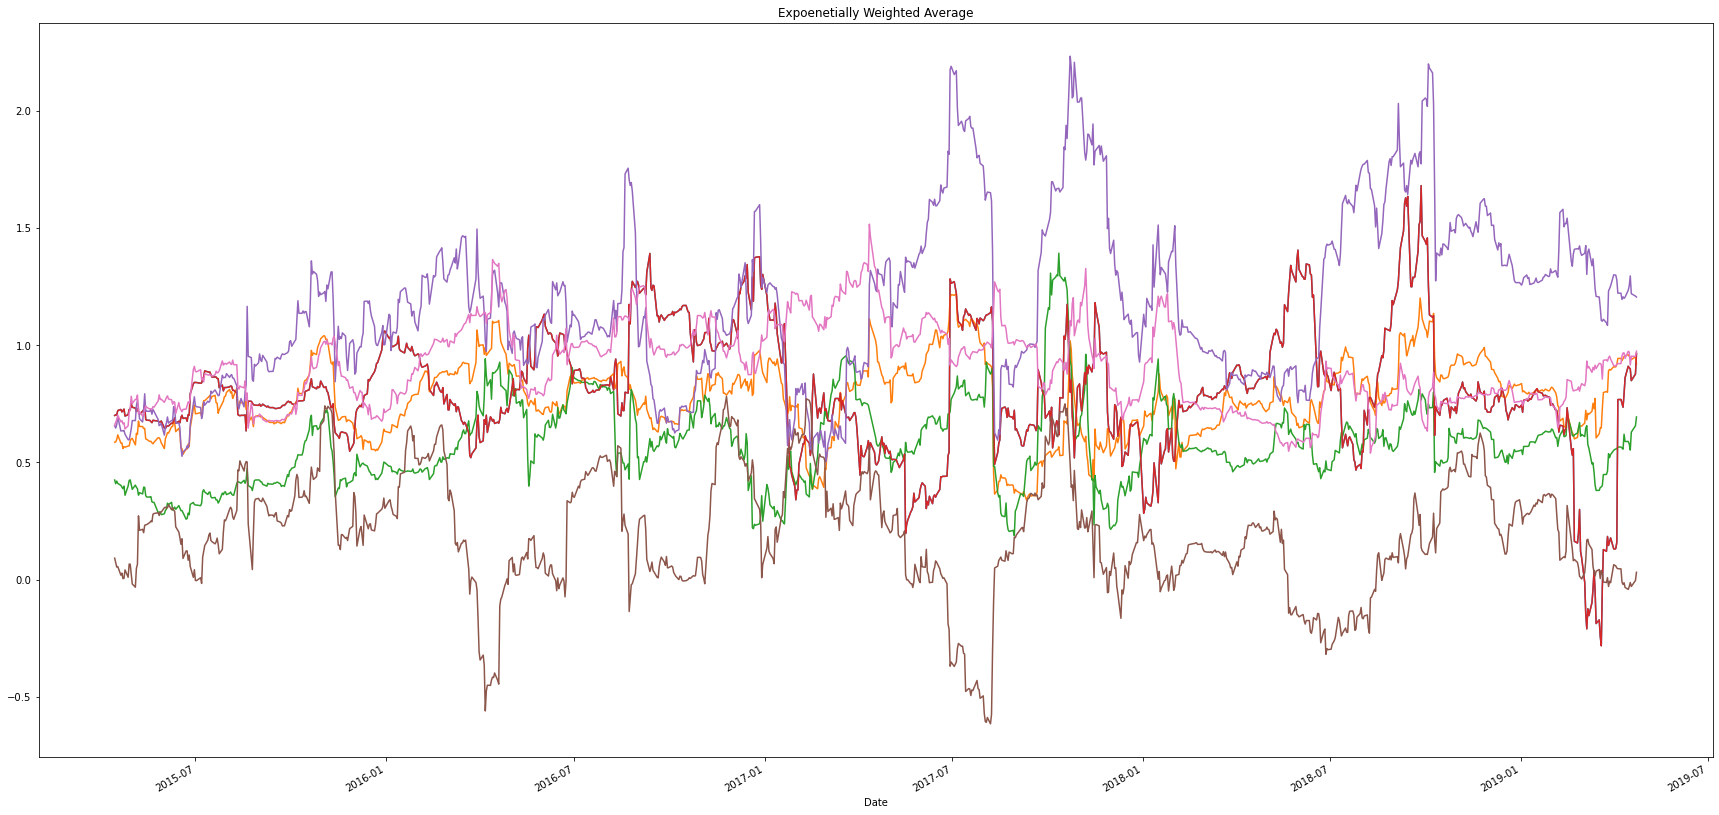

In [138]:
ax=portfolio_TGR_beta.plot(figsize=(30,15),title="Expoenetially Weighted Average");
portfolio_SOR_beta.plot(ax=ax)
portfolio_PAU_beta.plot(ax=ax)
portfolio_TGR_beta.plot(ax=ax)
portfolio_BER_beta.plot(ax=ax)
portfolio_ALG1_beta.plot(ax=ax)
portfolio_ALG2_beta.plot(ax=ax)

In [140]:
#Calculate Sharp ratio
portfolio_sharp_ratios=(portfolio_combined.mean()*252)/(portfolio_combined.std()*np.sqrt(252))
portfolio_sharp_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

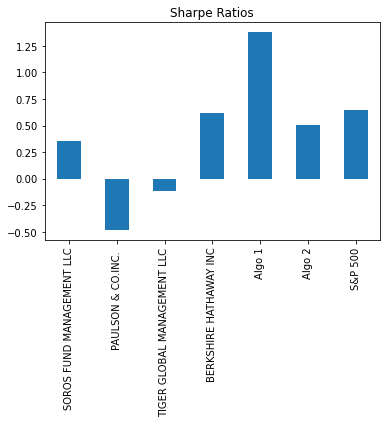

In [142]:
portfolio_sharp_ratios.plot(kind="bar", title="Sharpe Ratios");

In [249]:
cost_upload = Path("C:\\Users\\vinot\\Fintech_Homeworks\\HW03_Pandas\\cost_historical.csv")
goog_upload = Path("C:\\Users\\vinot\\Fintech_Homeworks\\HW03_Pandas\\goog_historical.csv")
aapl_upload = Path("C:\\Users\\vinot\\Fintech_Homeworks\\HW03_Pandas\\aapl_historical.csv")

In [250]:
appl_data=pd.read_csv(aapl_upload,index_col="Trade DATE",parse_dates=True,infer_datetime_format=True)
cost_data=pd.read_csv(cost_upload,index_col="Trade DATE",parse_dates=True,infer_datetime_format=True)
goog_data=pd.read_csv(goog_upload,index_col="Trade DATE",parse_dates=True,infer_datetime_format=True)

In [251]:
appl_upd=appl_data.sort_values("Trade DATE",ascending=True)
cost_upd=cost_data.sort_values("Trade DATE",ascending=True)
goog_upd=goog_data.sort_values("Trade DATE",ascending=True)

In [252]:
appl_upd.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [253]:
cost_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [254]:
goog_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [255]:
#Combined all the data sheet into single dataframe
usr_portfolio=pd.concat([appl_upd,cost_data,goog_data],axis='rows',join='inner')
usr_portfolio.dropna(inplace=True)
usr_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [256]:
#usr_portfolio.insert(loc=0,column="",value=np.arange(len(usr_portfolio)))
#usr_portfolio[''] = usr_portfolio.index if usr_portfolio.index.is_monotonic_increasing else range(len(usr_portfolio))

In [258]:
#Pivot the dataframe
usr_portfolio_upd=usr_portfolio.pivot(columns="Symbol",values="NOCP")
usr_portfolio_upd.dropna(inplace=True)
usr_portfolio_upd

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [259]:
#Caculate the daily returns
usr_portfolio_rtns=usr_portfolio_upd.pct_change()
usr_portfolio_rtns.dropna(inplace=True)
usr_portfolio_rtns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [260]:
#assging the weights and calculate the risk
weights=[1/3,1/3,1/3]
usr_pf_wg_rtns=usr_portfolio_rtns.dot(weights)
usr_pf_wg_rtns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [261]:
usr_pf_wg_rtns.tail()

Trade DATE
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
dtype: float64

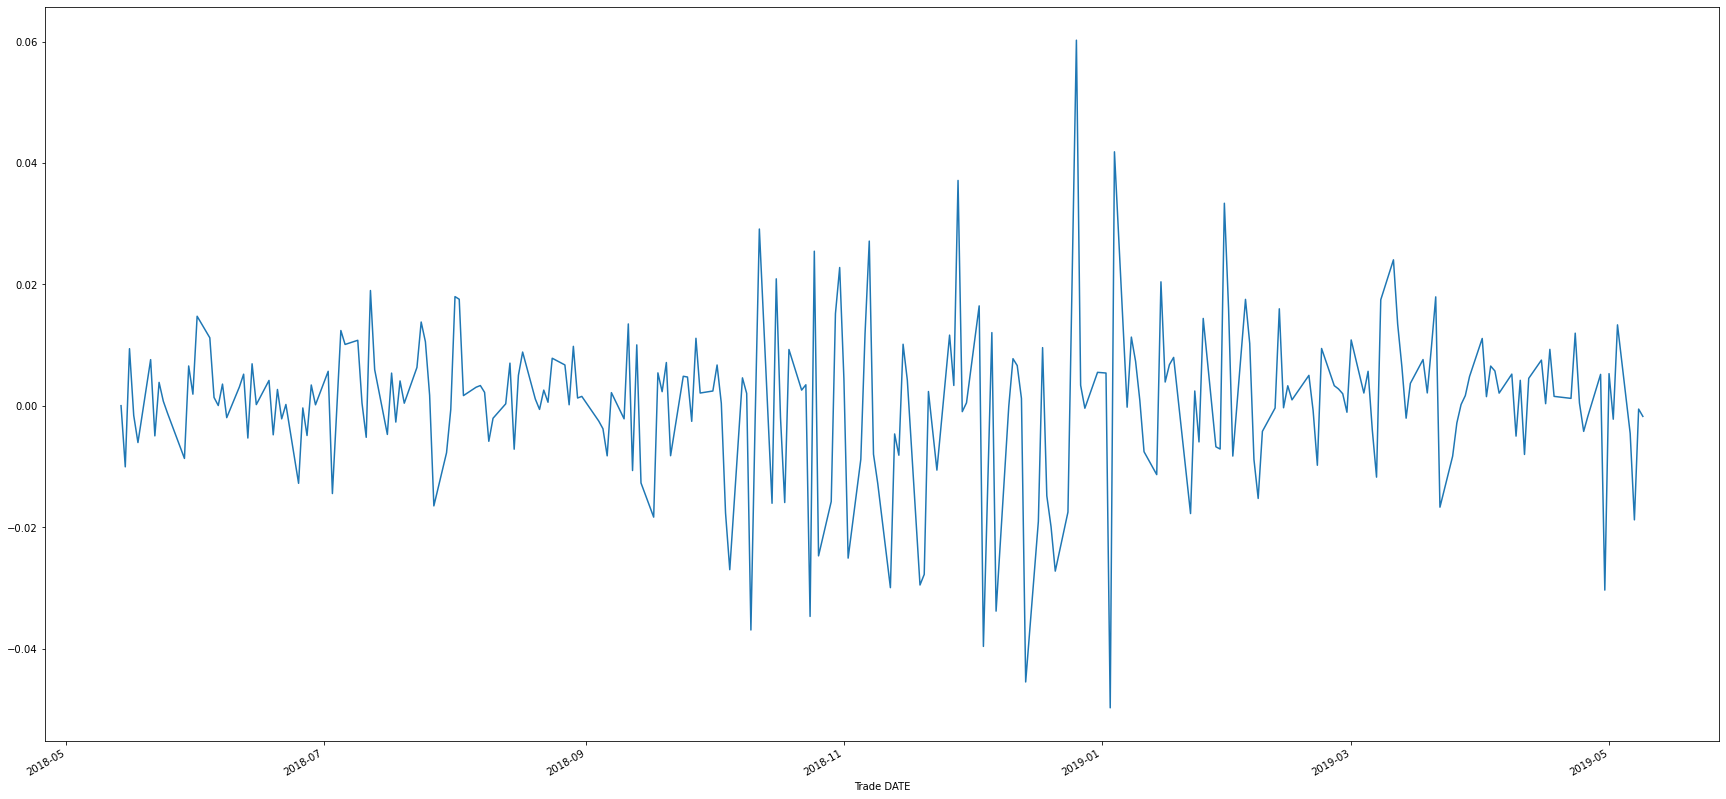

In [262]:
usr_pf_wg_rtns.plot(figsize=(30,15));

In [263]:
#Combine the Custom dataframe to the combined whale dataframe
new_portfolio_combined = pd.concat([portfolio_combined,usr_pf_wg_rtns], axis='columns', join='inner')

In [264]:
new_portfolio_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [265]:
# Rename the column name
new_portfolio_combined=new_portfolio_combined.rename(columns={0:"Custom"})

In [266]:
new_portfolio_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [268]:
new_portfolio_combined.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

In [270]:
# Calculate the daily std
combined_pf_daily_std = new_portfolio_combined.std()
print(combined_pf_daily_std)

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
Custom                         0.013323
dtype: float64


In [271]:
#Calculate the Annual Standard Deviation
combined_portfolio_annual_std=combined_pf_daily_std*np.sqrt(252)
print(combined_portfolio_annual_std)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64


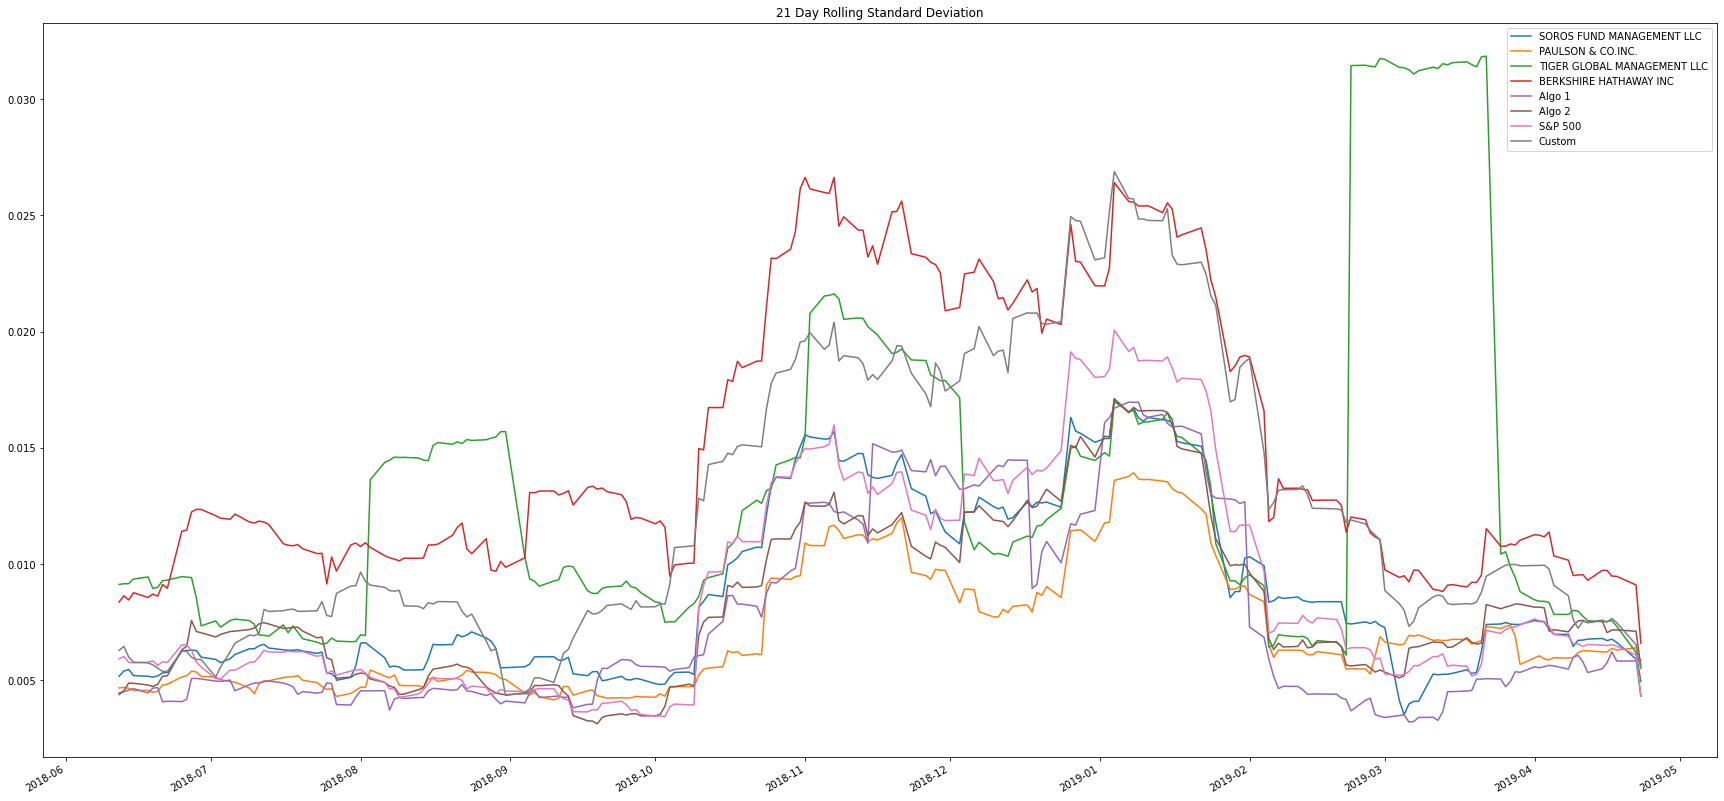

In [272]:
new_portfolio_combined.rolling(window=21).std().plot(figsize=(30,15), title="21 Day Rolling Standard Deviation");

In [273]:
#Calucate Sharp Ratios for the Custom Combined Portfolio.
combined_portfolio_sharpe_ratios = (new_portfolio_combined.mean() * 252) / (new_portfolio_combined.std() * np.sqrt(252))
combined_portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

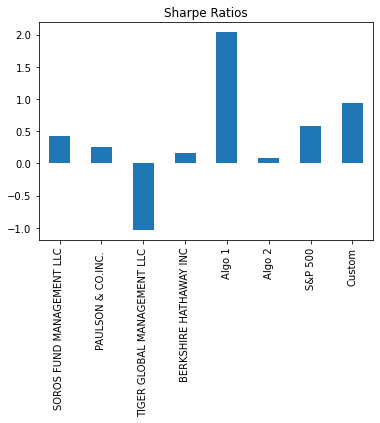

In [274]:
#Calculate Sharp Ratios for the combined Portfolio.
combined_portfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

In [275]:
#Calculate the correlation for the custom combined portfolio
combined_portfolio_correlation=new_portfolio_combined.corr()
combined_portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


In [276]:
#Calculate rolling Co-Variance and Rolling variance for the Custom Combined portfolio.
portfolio_custom_rolling_covariance=new_portfolio_combined['Custom'].rolling(window=30).cov(new_portfolio_combined['S&P 500'])
new_portfolio_rolling_variance=new_portfolio_combined['S&P 500'].rolling(window=30).var()

In [277]:
#Calculate Beta for Custom Portfolio
portfolio_Custom_Beta=portfolio_custom_rolling_covariance / new_portfolio_rolling_variance

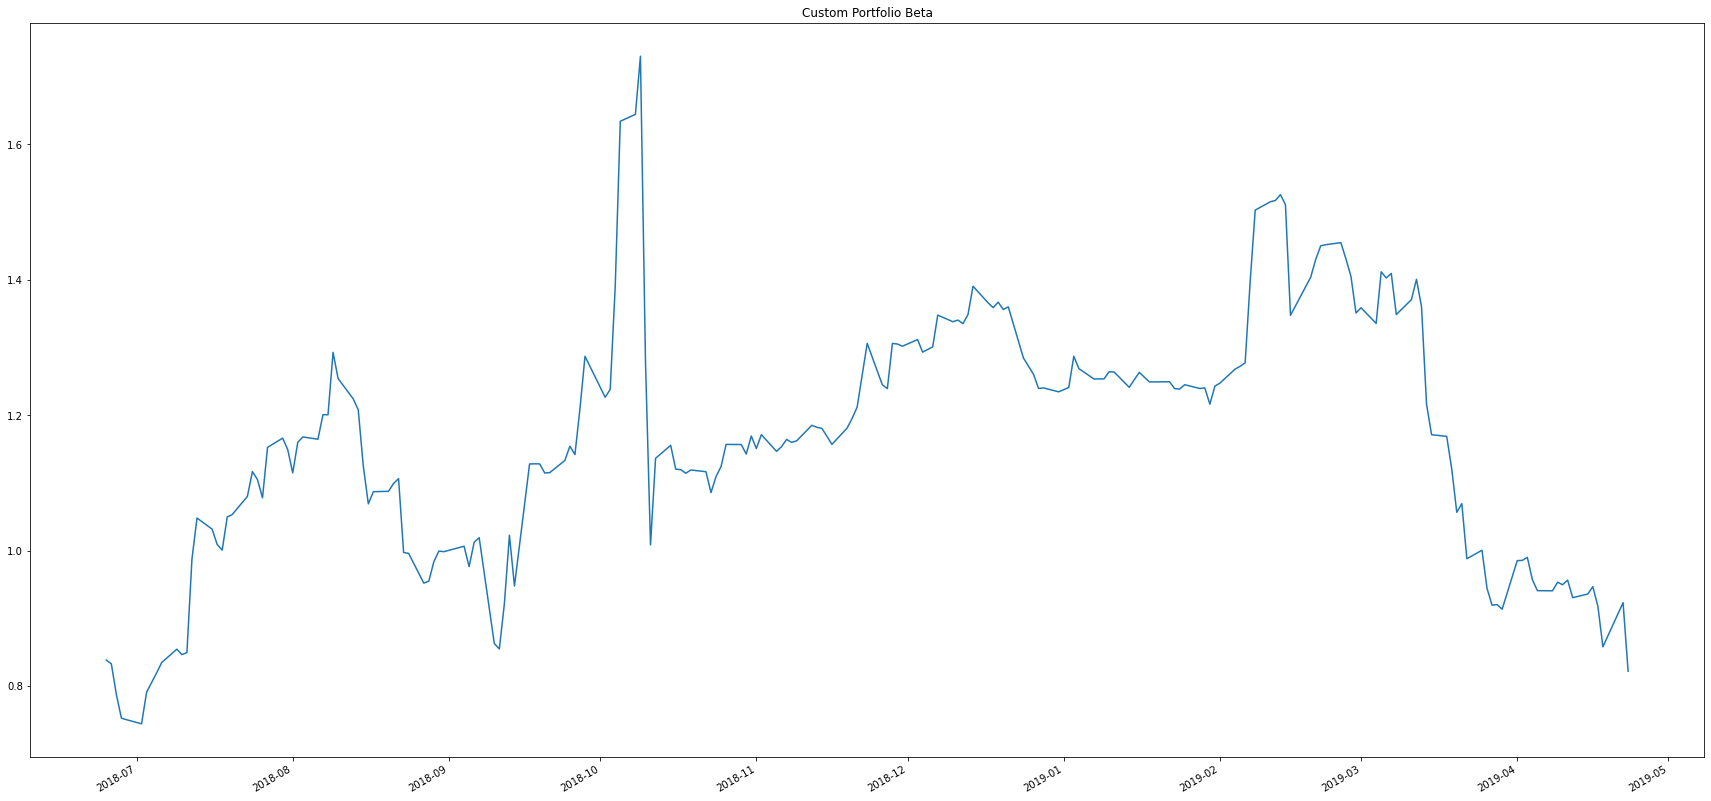

In [278]:
#Plot Beta graph for custom stocks
portfolio_Custom_Beta.plot(figsize=(30,15),title="Custom Portfolio Beta");